In [1]:
import numpy as np
import scipy
from scipy.io import loadmat
import mne, glob
from mne_features.feature_extraction import extract_features
import pandas as pd
from ipynb.fs.full.fullDataExtraction import getRawArrayData
from ipynb.fs.full.LabelTesting import makeOutThreeArr
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd
from featurewiz import featurewiz

Imported 0.2.03 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [3]:
def compute_diffEnt(data):
    return scipy.stats.differential_entropy(data, axis=-1)

In [4]:
matfiles = glob.glob('Preprocessed_EEG/*.mat')
matfiles.sort()
labels=loadmat(matfiles[15])
label_list=np.ndarray.tolist(labels['label'])[0]
x=getRawArrayData()
selected_funcs = ['hjorth_complexity','hjorth_mobility',('diffEnt', compute_diffEnt),'std','skewness','mean','variance','ptp_amp','kurtosis','rms','hurst_exp','katz_fd']
allData=np.zeros((1,13))
for clips in x[0]:
    cur_clip=mne.make_fixed_length_epochs(x[0][clips], duration=1, preload=True,verbose=0)
    epoch_array=mne.Epochs.get_data(cur_clip)
    cur_label=label_list[clips]
    cur_func=[selected_funcs[0]]
    extracted_data=extract_features(epoch_array,200,cur_func)
    one_feature=np.reshape(extracted_data[0],(62,1))
    for row in range (1,extracted_data.shape[0]):
        cur_time_read = np.reshape(extracted_data[row],(62,1))
        one_feature = np.vstack((one_feature,cur_time_read))
    com=np.zeros((one_feature.shape[0],1))
    com=np.hstack((com,one_feature))
    for i in range(1,len(selected_funcs)):
        cur_func=[selected_funcs[i]]
        extracted_data=extract_features(epoch_array,200,cur_func)
        one_feature=np.reshape(extracted_data[0],(62,1))
        for j in range (1,extracted_data.shape[0]):
            cur_time_read = np.reshape(extracted_data[j],(62,1))
            one_feature = np.vstack((one_feature,cur_time_read))
        com = np.hstack((com,one_feature))
    label_col=np.zeros((com.shape[0],1))+cur_label
    com=np.delete(com, 0, axis=1)
    com = np.hstack((com,label_col))
    allData=np.vstack((allData,com))
allData=np.delete(allData,0,axis=0)
allLabel=allData[:,-1]
allData = np.delete(allData,12,axis=1)

In [9]:
allLabel=np.reshape(allLabel,(allData.shape[0],1))

In [11]:
allData = np.hstack((allData,allLabel))

In [13]:
col_name= ['hjorth_complexity','hjorth_mobility','diffEnt','std','skewness','mean','variance','ptp_amp','kurtosis','rms','hurst_exp','katz_fd','label']
df = pd.DataFrame(allData, columns =col_name)

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.7
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (210428, 13)
#### Single_Label Multi_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Multi_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
#######################################################################################
##############

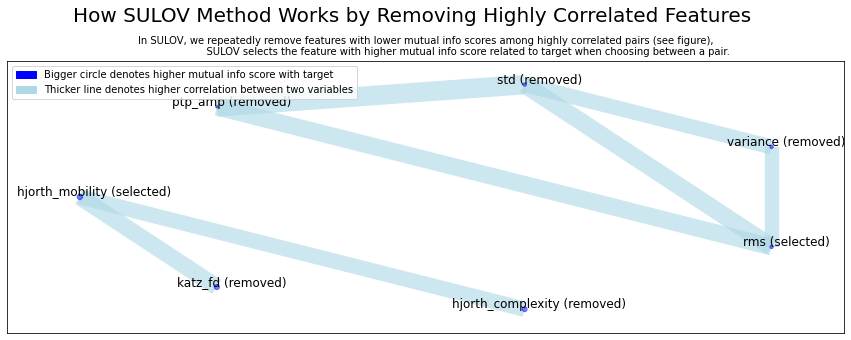

Time taken for SULOV method = 40 seconds
    Adding 0 categorical variables to reduced numeric variables  of 7
Final list of selected 7 vars after SULOV = ['diffEnt', 'hurst_exp', 'kurtosis', 'mean', 'skewness', 'hjorth_mobility', 'rms']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 7 
    Taking top 3 features per iteration...
    XGBoost version using 1.7.1 as tree method: hist
Number of booster rounds = 20
        using 7 variables...
            selecting 3 features in this iteration
            Time taken for regular XGBoost feature selection = 2 seconds
        using 5 variables...
            selecting 2 features in this 

In [15]:
features = featurewiz(df, target='label', corr_limit=0.70, verbose=1)

In [20]:
features[0]

['hjorth_mobility', 'diffEnt', 'rms', 'skewness']

In [1]:
from ipynb.fs.full.feature_selection import get_features

Imported 0.2.03 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [2]:
features=get_features()

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.7
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (210429, 13)
#### Single_Label Multi_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Multi_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
#######################################################################################
##############

In [3]:
features

['hjorth_mobility', 'diffEnt', 'rms', 'skewness']